<a href="https://colab.research.google.com/github/saraanan3/AI/blob/main/AI%20FINAL-SUBMISSION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import**


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://raw.githubusercontent.com/saraanan3/AI/main/Dataset_with_Combine_Column.csv'
data = pd.read_csv(url)
data.head()


,Age Category,Salary Category,Purchased,Combine
0,Young,Low,0,YL
1,Middle age,Low,0,ML
2,Young,Low,0,YL
3,Young,Low,0,YL
4,Young,Low,0,YL


**Analysis**

       Age Category Salary Category
count           400             400
unique            3               2
top      Middle age             Low
freq            175             280


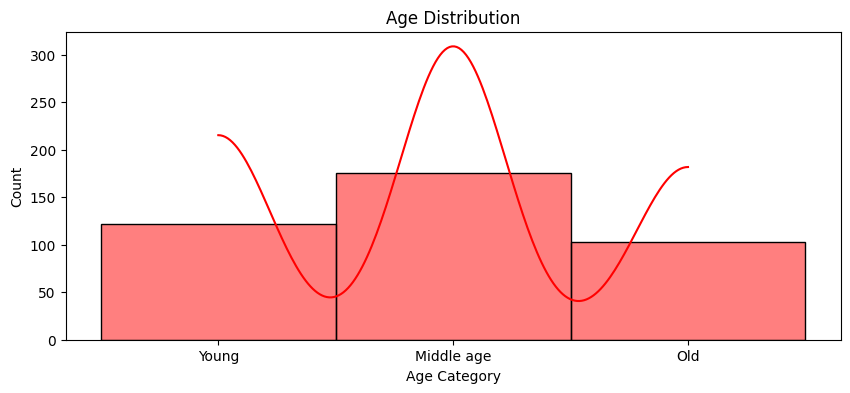

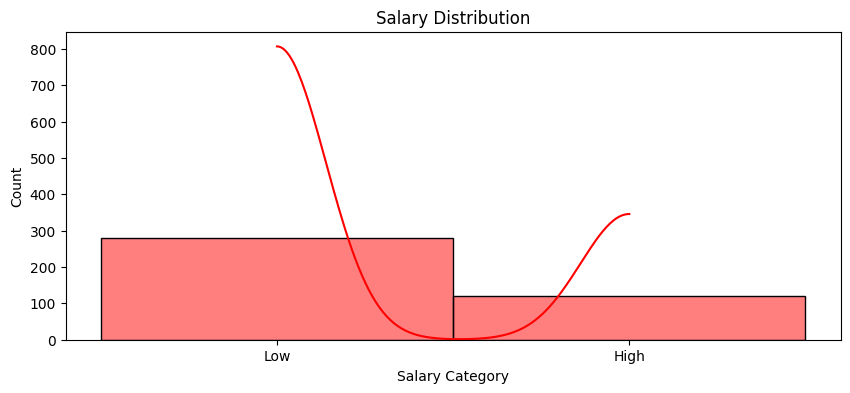

In [ ]:
print(data[['Age Category', 'Salary Category']].describe())

plt.figure(figsize=(10, 4))
sns.histplot(data['Age Category'], bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

plt.figure(figsize=(10, 4))
sns.histplot(data['Salary Category'], bins=20, kde=True)
plt.title('Salary Distribution')
plt.show()


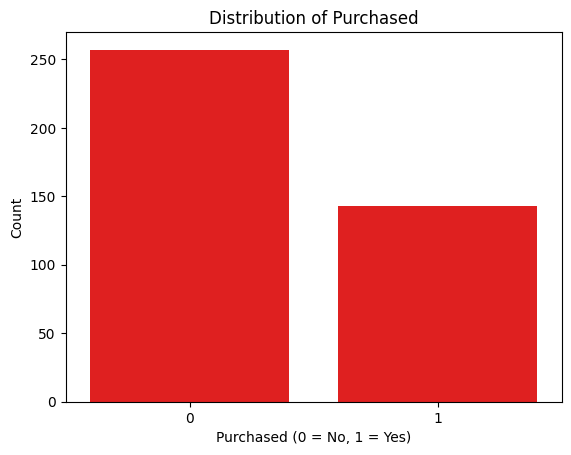

In [ ]:
sns.countplot(x='Purchased', data=data)
plt.title('Distribution of Purchased')
plt.xlabel('Purchased (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


Combine
MH    36
ML    12
OH    39
OL    49
YH     7
Name: Purchased, dtype: int64


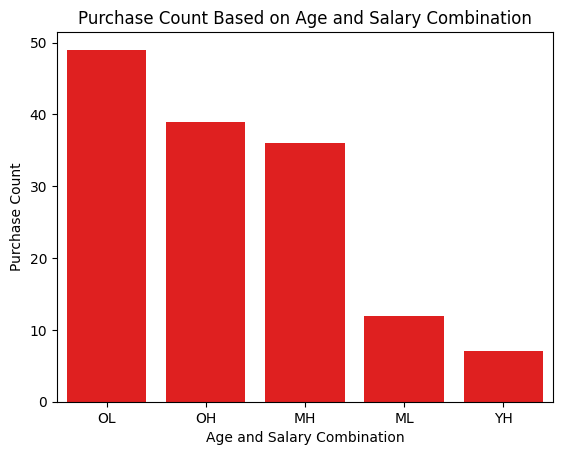

In [ ]:
Purchased = data[data['Purchased'] == 1]
Purchased_count = Purchased.groupby('Combine')['Purchased'].size()
print(Purchased_count)

purchased_df = data[data['Purchased'] == 1]

purchase_count = purchased_df['Combine'].value_counts()

sns.barplot(x=purchase_count.index, y=purchase_count.values)
plt.title('Purchase Count Based on Age and Salary Combination')
plt.xlabel('Age and Salary Combination')
plt.ylabel('Purchase Count')
plt.show()


YL (Young low) combination does not have any purchases

Combine
MH      8
ML    119
OH      5
OL     10
YH     25
YL     90
Name: Purchased, dtype: int64


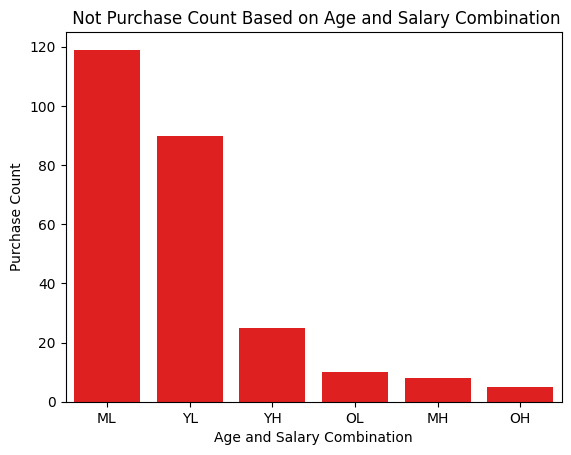

In [ ]:
NonPurchased = data[data['Purchased'] == 0]
NonPurchased_count = NonPurchased.groupby('Combine')['Purchased'].size()
print(NonPurchased_count)

NonPurchased_df = data[data['Purchased'] == 0]
NonPurchase_count = NonPurchased_df['Combine'].value_counts()

sns.barplot(x=NonPurchase_count.index, y=NonPurchase_count.values)
plt.title(' Not Purchase Count Based on Age and Salary Combination')
plt.xlabel('Age and Salary Combination')
plt.ylabel('Purchase Count')
plt.show()


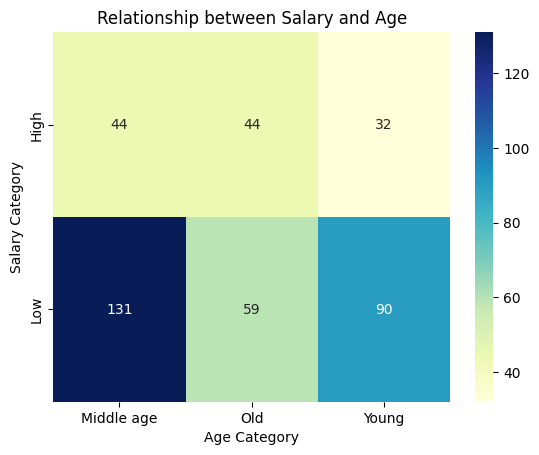

In [ ]:
contingency_table = pd.crosstab(data['Salary Category'], data['Age Category'])

sns.heatmap(contingency_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title("Relationship between Salary and Age")
plt.xlabel("Age Category")
plt.ylabel("Salary Category")
plt.show()


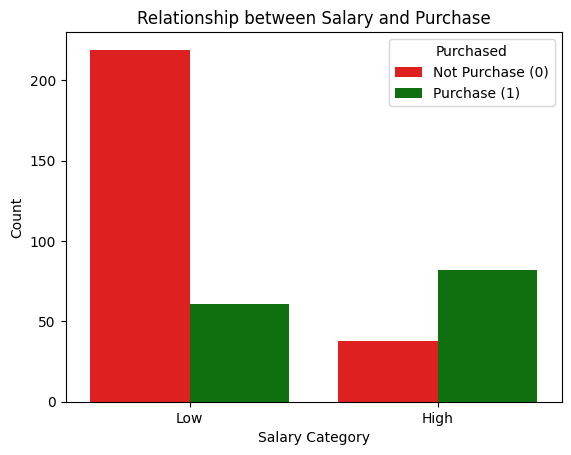

In [ ]:

sns.countplot(x='Salary Category', hue='Purchased', data=data)
plt.title("Relationship between Salary and Purchase")
plt.xlabel("Salary Category")
plt.ylabel("Count")
plt.legend(title="Purchased", labels=["Not Purchase (0)", "Purchase (1)"])
plt.show()


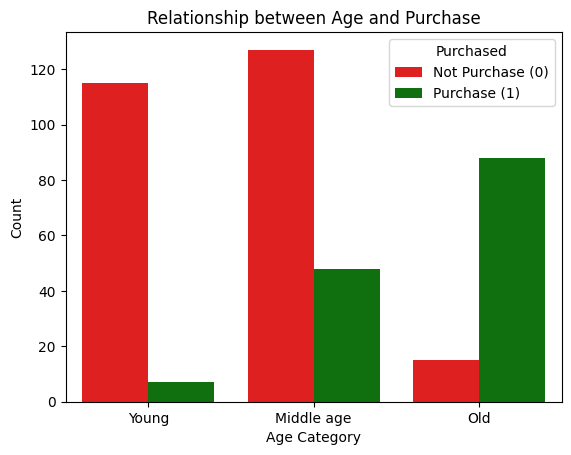

In [ ]:
sns.countplot(x='Age Category', hue='Purchased', data=data)
plt.title("Relationship between Age and Purchase")
plt.xlabel("Age Category")
plt.ylabel("Count")
plt.legend(title="Purchased", labels=["Not Purchase (0)", "Purchase (1)"])
plt.show()


                         Age Category Numeric  Salary Category Numeric  \
Age Category Numeric                 1.000000                 0.129008   
Salary Category Numeric              0.129008                 1.000000   
Purchased                            0.611835                 0.445074   

                         Purchased  
Age Category Numeric      0.611835  
Salary Category Numeric   0.445074  
Purchased                 1.000000  


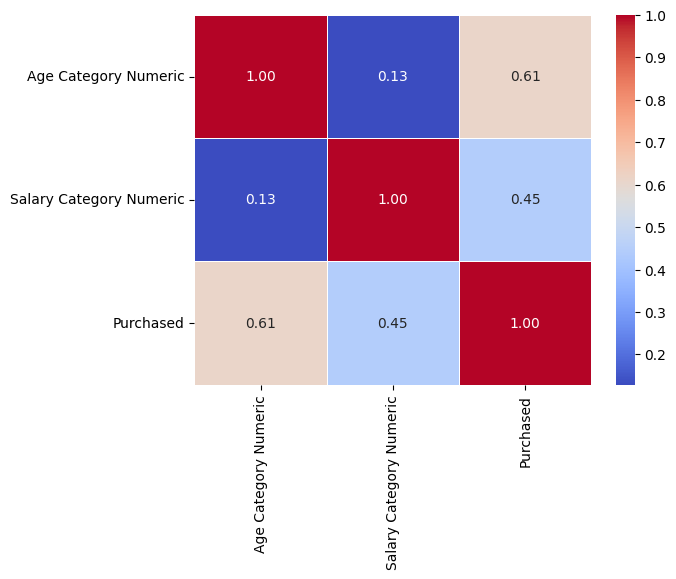

In [ ]:
age_mapping = {'Young': 0, 'Middle age': 1, 'Old': 2}
salary_mapping = {'Low': 0, 'High': 1}

data['Age Category Numeric'] = data['Age Category'].map(age_mapping)
data['Salary Category Numeric'] = data['Salary Category'].map(salary_mapping)

correlation_matrix = data[['Age Category Numeric', 'Salary Category Numeric', 'Purchased']].corr()
print(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()

**Construction of the Hidden Markov Model**

In [6]:
!pip install hmmlearn
from hmmlearn import base, hmm
from matplotlib import pyplot
import numpy
from math import *

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.6/164.6 kB 5.1 MB/s eta 0:00:00


In [24]:
df = pd.read_csv("https://raw.githubusercontent.com/saraanan3/AI/main/Dataset_with_Combine_Column.csv", delimiter=',')

markov_model = {}

for i in range(len(df['Salary Category']) - 1):
  curr_state = df['Salary Category'][i]
  next_state = df['Salary Category'][i + 1]
  if curr_state not in markov_model:
    markov_model[curr_state] = {next_state: 1}
  else:
    if next_state in markov_model[curr_state]:
      markov_model[curr_state][next_state] += 1
    else:
      markov_model[curr_state][next_state] = 1

for curr_state, transitions in markov_model.items():
  total = sum(transitions.values())
  for state, count in transitions.items():
    markov_model[curr_state][state] = count / total

for state, transitions in markov_model.items():
  print(f"{state}: {transitions}")


Low: {'Low': 0.6810035842293907, 'High': 0.31899641577060933}
High: {'High': 0.25833333333333336, 'Low': 0.7416666666666667}


In [25]:
df = pd.read_csv("https://raw.githubusercontent.com/saraanan3/AI/main/Dataset_with_Combine_Column.csv", delimiter=',')

markov_model = {}
for i in range(len(df['Age Category']) - 1):
  curr_state = df['Age Category'][i]
  next_state = df['Age Category'][i + 1]

  if curr_state not in markov_model:
    markov_model[curr_state] = {next_state: 1}
  else:
    if next_state in markov_model[curr_state]:
      markov_model[curr_state][next_state] += 1
    else:
      markov_model[curr_state][next_state] = 1

for curr_state, transitions in markov_model.items():
  total = sum(transitions.values())
  for state, count in transitions.items():
    markov_model[curr_state][state] = count / total

for state, transitions in markov_model.items():
  print(f"{state}: {transitions}")


Young: {'Middle age': 0.27049180327868855, 'Young': 0.7131147540983607, 'Old': 0.01639344262295082}
Middle age: {'Young': 0.17714285714285713, 'Old': 0.3142857142857143, 'Middle age': 0.5085714285714286}
Old: {'Middle age': 0.5196078431372549, 'Old': 0.45098039215686275, 'Young': 0.029411764705882353}


In [27]:
df = pd.read_csv("https://raw.githubusercontent.com/saraanan3/AI/main/Dataset_with_Combine_Column.csv", delimiter=',')

markov_model = {}
for i in range(len(df['Combine']) - 1):
  curr_state = df['Combine'][i]
  next_state = df['Combine'][i + 1]

  if curr_state not in markov_model:
    markov_model[curr_state] = {next_state: 1}
  else:
    if next_state in markov_model[curr_state]:
      markov_model[curr_state][next_state] += 1
    else:
      markov_model[curr_state][next_state] = 1

for curr_state, transitions in markov_model.items():
  total = sum(transitions.values())
  for state, count in transitions.items():
    markov_model[curr_state][state] = count / total

print("Transition probabilities between 'Combine' column:")
for state, transitions in markov_model.items():
  print(f"{state}: {transitions}")


Transition probabilities between 'Combine' column:
YL: {'ML': 0.14444444444444443, 'YL': 0.5222222222222223, 'YH': 0.23333333333333334, 'OL': 0.022222222222222223, 'MH': 0.07777777777777778}
ML: {'YL': 0.1297709923664122, 'OL': 0.13740458015267176, 'ML': 0.3893129770992366, 'MH': 0.15267175572519084, 'YH': 0.04580152671755725, 'OH': 0.1450381679389313}
YH: {'MH': 0.0625, 'ML': 0.34375, 'YL': 0.5, 'YH': 0.09375}
MH: {'YL': 0.13636363636363635, 'OH': 0.18181818181818182, 'ML': 0.3409090909090909, 'MH': 0.06818181818181818, 'YH': 0.045454545454545456, 'OL': 0.22727272727272727}
OL: {'ML': 0.3103448275862069, 'OL': 0.3793103448275862, 'YL': 0.034482758620689655, 'MH': 0.06896551724137931, 'OH': 0.20689655172413793}
OH: {'YL': 0.022727272727272728, 'OL': 0.1590909090909091, 'OH': 0.11363636363636363, 'MH': 0.18181818181818182, 'ML': 0.5227272727272727}


In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/saraanan3/AI/main/Dataset_with_Combine_Column.csv", delimiter=',')

markov_model = {}
for i in range(len(df['Combine']) - 1):
  curr_state = df['Combine'][i]
  next_state = df['Purchased'][i]

  if curr_state not in markov_model:
    markov_model[curr_state] = {next_state: 1}
  else:
    if next_state in markov_model[curr_state]:
      markov_model[curr_state][next_state] += 1
    else:
      markov_model[curr_state][next_state] = 1

for curr_state, transitions in markov_model.items():
  total = sum(transitions.values())
  for state, count in transitions.items():
    markov_model[curr_state][state] = count / total

print("Emission probabilities:")
for state, transitions in markov_model.items():
  print(f"{state}: {transitions}")


Emission probabilities:
YL: {0: 1.0}
ML: {0: 0.9083969465648855, 1: 0.0916030534351145}
YH: {0: 0.78125, 1: 0.21875}
MH: {1: 0.8181818181818182, 0: 0.18181818181818182}
OL: {1: 0.8275862068965517, 0: 0.1724137931034483}
OH: {0: 0.11363636363636363, 1: 0.8863636363636364}


In [71]:
states = ["YL", "ML", "YH","MH", "OL", "OH"]
n_states = len(states)
print('Number of hidden states :',n_states)
observations = [0, 1]
n_observations = len(observations)
print('Number of observations  :',n_observations)


transition_probability = np.array([
    [0.14444444444444443, 0.5222222222222223, 0.23333333333333334,
     0.022222222222222223, 0.07777777777777778, 0],                    # Transitions from YL

    [0.1297709923664122, 0.3893129770992366,  0.04580152671755725,
     0.15267175572519084,  0.13740458015267176, 0.1450381679389313],   # Transitions from ML

    [0.5, 0.34375, 0.09375, 0.0625, 0, 0],                             # Transitions from YH

    [0.13636363636363635, 0.3409090909090909,  0.045454545454545456,
     0.06818181818181818, 0.22727272727272727, 0.18181818181818182],    # Transitions from MH

    [0.034482758620689655, 0.3103448275862069, 0,
     0.06896551724137931, 0.3793103448275862, 0.20689655172413793],     # Transitions from OL

    [0.022727272727272728, 0.5227272727272727, 0,  0.18181818181818182,
     0.1590909090909091, 0.11363636363636363]                           # Transitions from OH
])
print("\nTransition probability:\n", transition_probability)

emission_probability= np.array([
    [1.0,     0.0   ],  # Emissions for YL
    [0.9083969465648855, 0.0916030534351145],  # Emissions for ML
    [0.78125, 0.21875],  # Emissions for YH
    [0.18181818181818182, 0.8181818181818182],  # Emissions for MH
    [0.1724137931034483, 0.8275862068965517],  # Emissions for OL
    [0.11363636363636363, 0.8863636363636364]   # Emissions for OH
])
print("\nEmission probability:\n", emission_probability)

model = hmm.CategoricalHMM(n_components=n_states)
model.transmat_ = transition_probability
model.emissionprob_ = emission_probability



# Define the sequence of observations
observations_list = [0, 1, 0, 1, 1, 1]
observations_sequence = np.array(observations_list).reshape(-1, 1)
print('Observation sequence:', ' '.join(map(str, observations_list)))

model.fit(observations_sequence)


hidden_states = model.predict(observations_sequence)
print("Most likely hidden states:", hidden_states)
print('Most likely hidden states (named):', ' '.join([states[x] for x in hidden_states]))


log_probability, hidden_states = model.decode(observations_sequence, algorithm='viterbi')
print('Log Probability:', log_probability)
print('Probability:', exp(log_probability))



Number of hidden states : 6
Number of observations  : 2

Transition probability:
 [[0.14444444 0.52222222 0.23333333 0.02222222 0.07777778 0.        ]
 [0.12977099 0.38931298 0.04580153 0.15267176 0.13740458 0.14503817]
 [0.5        0.34375    0.09375    0.0625     0.         0.        ]
 [0.13636364 0.34090909 0.04545455 0.06818182 0.22727273 0.18181818]
 [0.03448276 0.31034483 0.         0.06896552 0.37931034 0.20689655]
 [0.02272727 0.52272727 0.         0.18181818 0.15909091 0.11363636]]

Emission probability:
 [[1.         0.        ]
 [0.90839695 0.09160305]
 [0.78125    0.21875   ]
 [0.18181818 0.81818182]
 [0.17241379 0.82758621]
 [0.11363636 0.88636364]]
Observation sequence: 0 1 0 1 1 1
Most likely hidden states: [4 0 4 1 5 2]
Most likely hidden states (named): OL YL OL ML OH YH
Log Probability: -2.8003968555765177
Probability: 0.060785934600743954


In [68]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


url = 'https://raw.githubusercontent.com/saraanan3/AI/main/Dataset_with_Combine_Column.csv'
data = pd.read_csv(url)


combined_states = data['Combine']
purchased_observations = data['Purchased']


train_states, test_states, train_purchased, test_purchased = train_test_split(
    combined_states, purchased_observations, test_size=0.2, random_state=42
)


train_sequence = np.array(train_purchased).reshape(-1, 1)
test_sequence = np.array(test_purchased).reshape(-1, 1)

model = hmm.CategoricalHMM(n_components=n_states)

model.transmat_ = transition_probability
model.emissionprob_ = emission_probability


model.fit(train_sequence)


predicted_states = model.predict(test_sequence)
predicted_purchases = [np.argmax(emission_probability[state]) for state in predicted_states]
accuracy = accuracy_score(test_purchased, predicted_purchases)



# print("Predicted Purchases:", predicted_purchases)
# print("Actual Purchases:", test_purchased)


comparison_df = pd.DataFrame({
    'Test Sample': np.arange(1, len(test_purchased) + 1),
    'Actual Purchases': test_purchased,
    'Predicted Purchases': predicted_purchases
})

comparison_df['Match'] = comparison_df['Actual Purchases'] == comparison_df['Predicted Purchases']
print(comparison_df)

print("Accuracy on test data:", accuracy)

     Test Sample  Actual Purchases  Predicted Purchases  Match
209            1                 0                    1  False
280            2                 1                    1   True
33             3                 0                    1  False
210            4                 1                    1   True
93             5                 0                    1  False
..           ...               ...                  ...    ...
246           76                 0                    1  False
227           77                 1                    1   True
369           78                 1                    1   True
176           79                 0                    1  False
289           80                 1                    1   True

[80 rows x 4 columns]
Accuracy on test data: 0.35
